In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
air = pd.read_excel("D:/Vivek/assingment/18  Forecasting/Airlines+Data.xlsx")

In [3]:
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
air.shape

(96, 2)

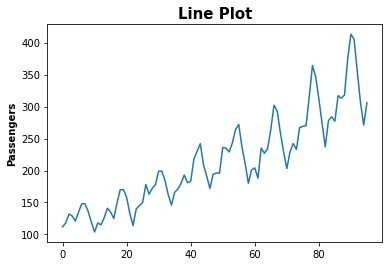

In [6]:
plt.title("Line Plot", size = 15, weight = 'bold')
plt.ylabel("Passengers", size = 10, weight = 'bold')
plt.plot(air['Passengers'])

In [7]:
air["month"] = air.Month.dt.strftime("%b")

In [8]:
air

,Month,Passengers,month
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May
...,...,...,...
91,2002-08-01,405,Aug
92,2002-09-01,355,Sep
93,2002-10-01,306,Oct
94,2002-11-01,271,Nov


In [9]:
data = pd.get_dummies(air["month"])

In [10]:
data

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [11]:
air1 = pd.concat([air,data],axis=1)

In [12]:
air1["t"] = np.arange(1,97)
air1["t_squared"] = air1["t"]*air1["t"]
air1.columns
air1["log_passengers"] = np.log(air1["Passengers"])

In [13]:
air1

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<AxesSubplot:>

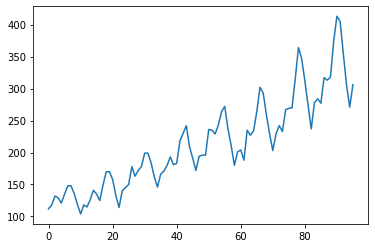

In [14]:
train= air1.head(88)
test=air1.tail(8)
air1.Passengers.plot()

In [15]:
indexedDataset = air1.set_index(['Month'])
indexedDataset.head(5)

,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
Month,,,,,,,,,,,,,,,,,
1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


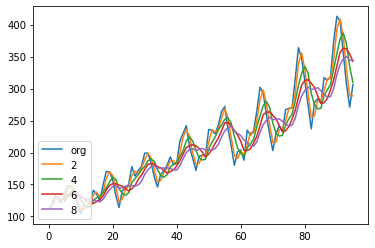

In [16]:
air1.Passengers.plot(label="org")
for i in range(2,10,2):
    air1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

In [17]:
import statsmodels.formula.api as smf

In [18]:
linear= smf.ols('Passengers~t',data=air1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Passengers'])-np.array(predlin))**2))
print("Root Mean Square Error : ",rmselin)

Root Mean Square Error :  27.06431994935798


In [19]:
quad=smf.ols('Passengers~t+t_squared',data=air1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_squared']])))
rmsequad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predquad))**2))
print("Root Mean Square Error : ",rmsequad)

Root Mean Square Error :  54.40869822000728


In [20]:
expo=smf.ols('log_passengers~t',data=air1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predexp)))**2))
print("Root Mean Square Error : ",rmseexpo)


Root Mean Square Error :  54.71281342390085


In [21]:
additive= smf.ols('Passengers~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=air1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predadd))**2))
print("Root Mean Square Error : ",rmseadd)

Root Mean Square Error :  122.96927017043728


In [22]:
addlinear= smf.ols('Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=air1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
predaddlinear

88    305.125
89    333.125
90    359.875
91    358.125
92    329.875
93    301.750
94    277.000
95    302.625
dtype: float64

In [23]:
rmseaddlinear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddlinear))**2))
print("Root Mean Square Error : ",rmseaddlinear)

Root Mean Square Error :  30.726172170480197


In [24]:
addquad=smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=air1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddquad))**2))
print("Root Mean Square Error : ",rmseaddquad)

Root Mean Square Error :  24.070103714158737


In [25]:
mulsea=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=air1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmsemul= np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmul)))**2))
print("Root Mean Square Error : ",rmsemul)

Root Mean Square Error :  134.11971475808645


In [26]:
mul_quad= smf.ols('log_passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=air1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
print("Root Mean Square Error : ",rmse_mul_quad)

Root Mean Square Error :  12.157969820458892


In [27]:
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsequad])}

In [28]:
Rmse=pd.DataFrame(data)
Rmse

,Model,Values
0,rmse_mul_quad,12.157970
1,rmseadd,122.969270
2,rmseaddlinear,30.726172
3,rmseaddquad,24.070104
4,rmseexpo,54.712813
5,rmselin,27.064320
6,rmsemul,134.119715
7,rmsequad,54.408698


In [29]:
data_Predict = pd.read_excel("D:/Vivek/assingment/18  Forecasting/Airlines+Data.xlsx")

In [30]:
Final_pred = smf.ols('log_passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=air1).fit()

In [31]:
pred_new  = pd.Series(Final_pred.predict(air1))

In [32]:
pred_new

0     4.679610
1     4.690898
2     4.834840
3     4.802751
4     4.796991
        ...   
91    5.968039
92    5.857037
93    5.726162
94    5.594949
95    5.730733
Length: 96, dtype: float64